In [7]:
from rl.common.logger import ConsoleLogger, FigureLogger, Tracker
from rl.ppo.policies import ActorCriticNet
from rl.ppo.ppo import PPO

from torch import optim
from env import VanillaEnv
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [8]:
def plot_evaluation_grid(grid, training_positions, min_obs_position,
                         min_floor_height):
    """Plots the evaluation grid."""
    fig, ax = plt.subplots(figsize=(7, 9))
    grid_x, grid_y = grid.shape
    extent = (0, grid_x, grid_y, 0)
    ax.imshow(grid.T, extent=extent, origin='lower', cmap='copper')

    x_ticks = np.arange(grid_x)
    y_ticks = np.arange(grid_y)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    # ax.tick_params(labelbottom=False, labelleft=False)
    ax.set_ylabel("Floor height")
    ax.set_xlabel("Obstacle position")
    
    # Loop over data dimensions and create text annotations.
    for (obstacle_pos, floor_height) in training_positions:
        pos_index = obstacle_pos - min_obs_position
        height_index = floor_height - min_floor_height
        ax.text(
            pos_index + 0.5,
            height_index + 0.5,
            'T',
            ha='center',
            va='center',
            color='r',
            fontsize='large')

    ax.grid(color='w', linewidth=1)
    fig.tight_layout()
    return fig

In [9]:
# obstacle_pos: min: 14, max: 47
obstacle_pos = np.array(range(14, 48))
# floor_height: min: 0, max: 40
floor_height = np.array(range(10, 35))
ALL_CONFIGURATIONS = set(itertools.product(obstacle_pos, floor_height))

grid = np.zeros((len(obstacle_pos), len(floor_height)))

TRAINING_CONFIGURATIONS = set([
    # (obstacle_pos, floor_height)
    (22, 18), (22, 24),
    (26, 18), (26,24),
])
TEST_CONFIGURATIONS = ALL_CONFIGURATIONS - TRAINING_CONFIGURATIONS

In [10]:
env = VanillaEnv()

num_actions = 2
num_episodes = 100

policy: ActorCriticNet = ActorCriticNet()
optimizer = optim.Adam(policy.parameters(), lr=0.001)

logger1 = ConsoleLogger(log_every=100)
logger2 = FigureLogger()
tracker = Tracker(logger1, logger2)

ppo = PPO(policy, env, optimizer, seed=31, tracker=tracker)
ppo.learn(5000)


Episode:    100, return: 24.0
Episode:    200, return: 24.0
Episode:    300, return: 24.0
Episode:    400, return: 24.0
Episode:    500, return: 24.0
Episode:    600, return: 24.0
Episode:    700, return: 24.0
Episode:    800, return: 24.0
Episode:    900, return: 24.0
Episode:   1000, return: 24.0
Episode:   1100, return: 24.0
Episode:   1200, return: 24.0
Episode:   1300, return: 24.0
Episode:   1400, return: 24.0
Episode:   1500, return: 24.0
Episode:   1600, return: 24.0
Episode:   1700, return: 24.0
Episode:   1800, return: 24.0
Episode:   1900, return: 24.0
Episode:   2000, return: 34.0
Episode:   2100, return: 36.0
Episode:   2200, return: 36.0
Episode:   2300, return: 35.0
Episode:   2400, return: 156.0
Episode:   2500, return: 36.0
Episode:   2600, return: 156.0
Episode:   2700, return: 156.0
Episode:   2800, return: 156.0
Episode:   2900, return: 156.0
Episode:   3000, return: 156.0
Episode:   3100, return: 156.0
Episode:   3200, return: 156.0
Episode:   3300, return: 156.0
E

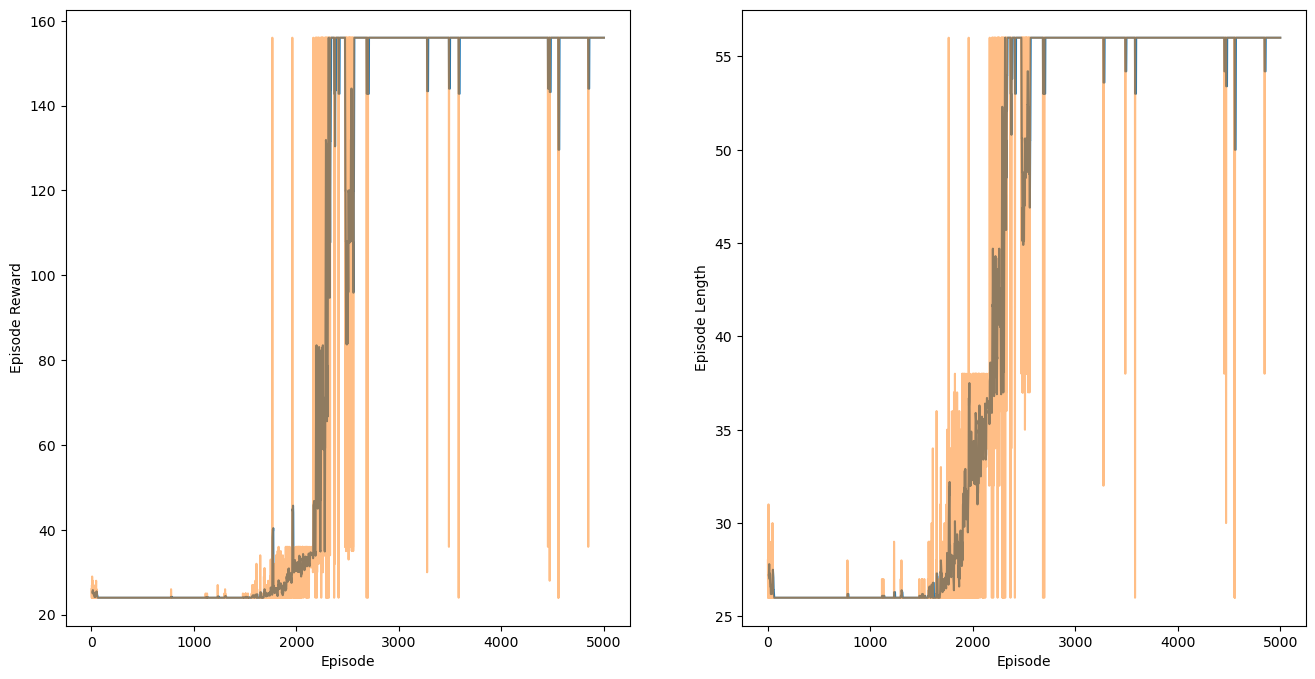

In [11]:
logger2.get_figure(fig_size=(16, 8))
plt.show()